In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
!wget https://launchpad.net/~alessandro-strada/+archive/ubuntu/google-drive-ocamlfuse-beta/+build/15331130/+files/google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
!dpkg -i google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
!apt-get install -f
!apt-get -y install -qq fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 131304 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.3-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.3-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.3-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
--2019-04-18 15:27:24--  https://launchpad.net/~alessandro-strada/+archive/ubuntu/google-drive-ocamlfuse-beta/+build/15331130/+files/google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
Resolving launchpad.net (launchpad.net)... 91.189.89.223, 91.189.89.222, 2001:67c:1560:8003::8003, ...
Connecting to launchpad.net (launchpad.net)|91.189.89.223|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2019-04-18 15:27:25 ERROR 404: Not Found.

dpkg: error: cannot access archive 'google-drive-ocaml

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
import torch
import torchvision
import numpy as np 
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [5]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True,num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transform)
testloader = torch.utils.data.DataLoader(testset,batch_size=4,shuffle=False,num_workers=2)
classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

0it [00:00, ?it/s]

100%|█████████▉| 170139648/170498071 [00:47<00:00, 3853680.99it/s]

Files already downloaded and verified


In [0]:
def imshow(img):
    img = img/2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()

In [0]:
dataiter = iter(trainloader)
images,labels = dataiter.next()

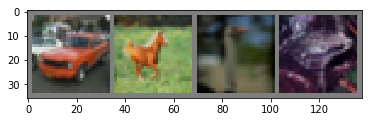

  car horse  bird  frog


In [12]:
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x 
    

In [0]:
net = Net()

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

In [17]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
net.to(device)

cpu


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [18]:
for epoch in range(2):
    
    running_loss = 0.0
    
    for i,data in enumerate(trainloader,0):
        
        inputs,labels = data
        inputs,labels = inputs.to(device),labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if i%2000 == 1999:
            print('[%d, %5d] loss: %.3f' %(epoch + 1,i + 1, running_loss/2000))
            running_loss = 0.0
            
print('Finished Training')

[1,  2000] loss: 1.199
[1,  4000] loss: 1.215
[1,  6000] loss: 1.213
[1,  8000] loss: 1.226
[1, 10000] loss: 1.189
[1, 12000] loss: 1.193
[2,  2000] loss: 1.108
[2,  4000] loss: 1.130
[2,  6000] loss: 1.115
[2,  8000] loss: 1.127
[2, 10000] loss: 1.113
[2, 12000] loss: 1.108
Finished Training


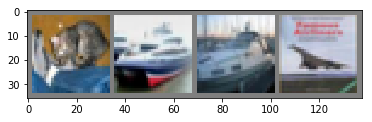

GroundTruth:   cat  ship  ship plane


In [20]:
dataiter = iter(testloader)
images,labels = dataiter.next()
images,labels = images.to(device),labels.to(device)

imshow(torchvision.utils.make_grid(images))
print('GroundTruth:',' '.join('%5s' %classes[labels[j]] for j in range(4)))

In [0]:
outputs = net(images)

In [22]:
_, predicted = torch.max(outputs,1)
print('Predicted: ',' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    dog  ship  ship plane


In [38]:
correct = 0
total = 0 
with torch.no_grad():
    for data in testloader:
        images,labels = data
        images,labels = images.to(device),labels.to(device)
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted==labels).sum().item()
        
print('Accuracy of the test images:  %d %%'   % (100 * correct / total))

Accuracy of the test images:  10 %


In [39]:
class_correct = list(0.for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs,1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
            
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 64 %
Accuracy of   car : 58 %
Accuracy of  bird : 48 %
Accuracy of   cat : 42 %
Accuracy of  deer : 51 %
Accuracy of   dog : 38 %
Accuracy of  frog : 70 %
Accuracy of horse : 71 %
Accuracy of  ship : 80 %
Accuracy of truck : 71 %
